## Data import

In [77]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
df =pd.read_csv('crime.csv', encoding = 'latin-1')
data = df.copy()

In [4]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA SHOOTING     OCCURRED_ON_DATE  YEAR  MONTH  \
0      D14            808      NaN  2018-09-02 13:00:00  2018      9   
1      C11            347      NaN  2018-08-21 00:00:00  2018      8   
2       D4            151      NaN  2018-09-03 19:27:00  2018      9   
3       D4            272      NaN  2018-09-03 21:16:00  2018      9   
4       B3            421      NaN  2018-09-03 21:05:00  2018      9   

  DAY_OF_WEEK  HOUR    UCR_PART       STREET        Lat       Long  \
0      Sunday    13    Part One   LINCOLN ST  42.357791 -71.139371   
1     Tuesday     0    Part Two     HECLA ST  42.306821 -71.060300   
2      Monday    19  Part Three  CAZENOVE ST  42.346589 -71.072429   
3      Monday    21  Part Three   NEWCOMB ST  42.334182 -71.078664   
4      Monday    21  Part Three     DELHI ST  42.275365 -71.090361   

                      Location  
0  (42.35779134, -71.13937053)  
1  (42.30682138, -71.06030035)  
2  (42.34658879, -71.07242943)  
3  (42.33418175, -71.07866441)  
4  (42.27536542, -71.09036101)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
OCCURRED_ON_DATE       319073 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 41.4+ MB


In [6]:
df.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  319073.000000  319073.000000  319073.000000  319073.000000   
mean     2317.546956    2016.560586       6.609719      13.118205   
std      1185.285543       0.996344       3.273691       6.294205   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  299074.000000  299074.000000  
mean       42.214381     -70.908272  
std         2.159766       3.493618  
min        -1.000000     -71.178674  
25%        42.297442     -71.097135  
50%        42.325538     -71.077524  
75%        42.348624     -71.062467  
max        42.395042      -1.000000

In [7]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

## To check if any of the columns has a missing value

In [8]:
count = 0
for i in df.columns:
    if df[i].isnull().values.any():
        print(i + ' True')
        count += 1
    else:
        print(i + ' False')
print (count)

INCIDENT_NUMBER False
OFFENSE_CODE False
OFFENSE_CODE_GROUP False
OFFENSE_DESCRIPTION False
DISTRICT True
REPORTING_AREA False
SHOOTING True
OCCURRED_ON_DATE False
YEAR False
MONTH False
DAY_OF_WEEK False
HOUR False
UCR_PART True
STREET True
Lat True
Long True
Location False
6


### number of missing values

In [9]:
df.isnull().sum()

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1765
REPORTING_AREA              0
SHOOTING               318054
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   90
STREET                  10871
Lat                     19999
Long                    19999
Location                    0
dtype: int64

### Zero Values in the dataset

In [10]:
j = 0
for i in df.columns:
    j = np.count_nonzero(df[i] == 0)
    print (i + ' ' + str(j))

INCIDENT_NUMBER 0
OFFENSE_CODE 0
OFFENSE_CODE_GROUP 0
OFFENSE_DESCRIPTION 0
DISTRICT 0
REPORTING_AREA 0
SHOOTING 0
OCCURRED_ON_DATE 0
YEAR 0
MONTH 0
DAY_OF_WEEK 0
HOUR 15106
UCR_PART 0
STREET 0
Lat 0
Long 0
Location 0


<IPython.core.display.Javascript object>


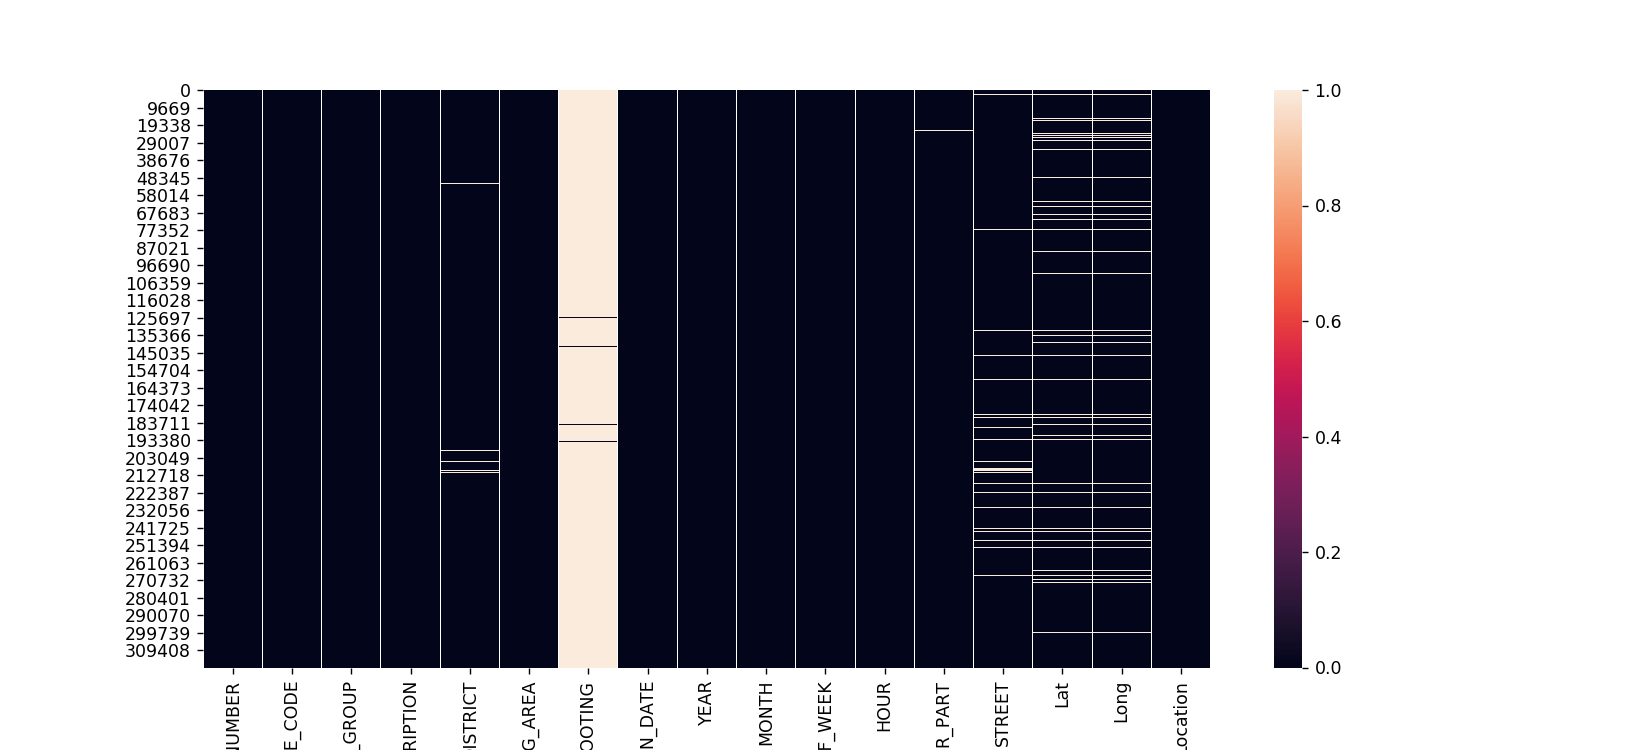

In [11]:
figure = plt.figure(figsize=(13,6))

In [12]:
sns.heatmap(df.isnull())

In [13]:
plt.close()

In [14]:
df['SHOOTING'][-10:]

319063    NaN
319064    NaN
319065    NaN
319066    NaN
319067    NaN
319068    NaN
319069    NaN
319070    NaN
319071    NaN
319072    NaN
Name: SHOOTING, dtype: object

In [15]:
df.drop('SHOOTING', axis = 1, inplace = True)

In [16]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA     OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0      D14            808  2018-09-02 13:00:00  2018      9      Sunday    13   
1      C11            347  2018-08-21 00:00:00  2018      8     Tuesday     0   
2       D4            151  2018-09-03 19:27:00  2018      9      Monday    19   
3       D4            272  2018-09-03 21:16:00  2018      9      Monday    21   
4       B3            421  2018-09-03 21:05:00  2018      9      Monday    21   

     UCR_PART       STREET        Lat       Long                     Location  
0    Part One   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)  
1    Part Two     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)  
2  Part Three  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)  
3  Part Three   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)  
4  Part Three     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)

In [17]:
df['OCCURRED_ON_DATE'].dtype

dtype('O')

In [18]:
df['OCCURRED_ON_DATE'] = pd.to_datetime(df['OCCURRED_ON_DATE'])

In [19]:
df['OCCURRED_ON_DATE'].dtype

dtype('<M8[ns]')

In [20]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE    OFFENSE_CODE_GROUP   OFFENSE_DESCRIPTION  \
0      I182070945           619               Larceny    LARCENY ALL OTHERS   
1      I182070943          1402             Vandalism             VANDALISM   
2      I182070941          3410                 Towed   TOWED MOTOR VEHICLE   
3      I182070940          3114  Investigate Property  INVESTIGATE PROPERTY   
4      I182070938          3114  Investigate Property  INVESTIGATE PROPERTY   

  DISTRICT REPORTING_AREA    OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR  \
0      D14            808 2018-09-02 13:00:00  2018      9      Sunday    13   
1      C11            347 2018-08-21 00:00:00  2018      8     Tuesday     0   
2       D4            151 2018-09-03 19:27:00  2018      9      Monday    19   
3       D4            272 2018-09-03 21:16:00  2018      9      Monday    21   
4       B3            421 2018-09-03 21:05:00  2018      9      Monday    21   

     UCR_PART       STREET        Lat       Long                     Location  
0    Part One   LINCOLN ST  42.357791 -71.139371  (42.35779134, -71.13937053)  
1    Part Two     HECLA ST  42.306821 -71.060300  (42.30682138, -71.06030035)  
2  Part Three  CAZENOVE ST  42.346589 -71.072429  (42.34658879, -71.07242943)  
3  Part Three   NEWCOMB ST  42.334182 -71.078664  (42.33418175, -71.07866441)  
4  Part Three     DELHI ST  42.275365 -71.090361  (42.27536542, -71.09036101)

### Making selected columns categorical

In [21]:
df.OFFENSE_CODE_GROUP    = df.OFFENSE_CODE_GROUP.astype('category')
df.OFFENSE_DESCRIPTION    = df.OFFENSE_DESCRIPTION.astype('category')
df.DISTRICT    = df.DISTRICT.astype('category')
df.DAY_OF_WEEK    = df.DAY_OF_WEEK.astype('category')
df.UCR_PART    = df.UCR_PART.astype('category')

In [22]:
df.dtypes

INCIDENT_NUMBER                object
OFFENSE_CODE                    int64
OFFENSE_CODE_GROUP           category
OFFENSE_DESCRIPTION          category
DISTRICT                     category
REPORTING_AREA                 object
OCCURRED_ON_DATE       datetime64[ns]
YEAR                            int64
MONTH                           int64
DAY_OF_WEEK                  category
HOUR                            int64
UCR_PART                     category
STREET                         object
Lat                           float64
Long                          float64
Location                       object
dtype: object

## Visualization-1

<IPython.core.display.Javascript object>


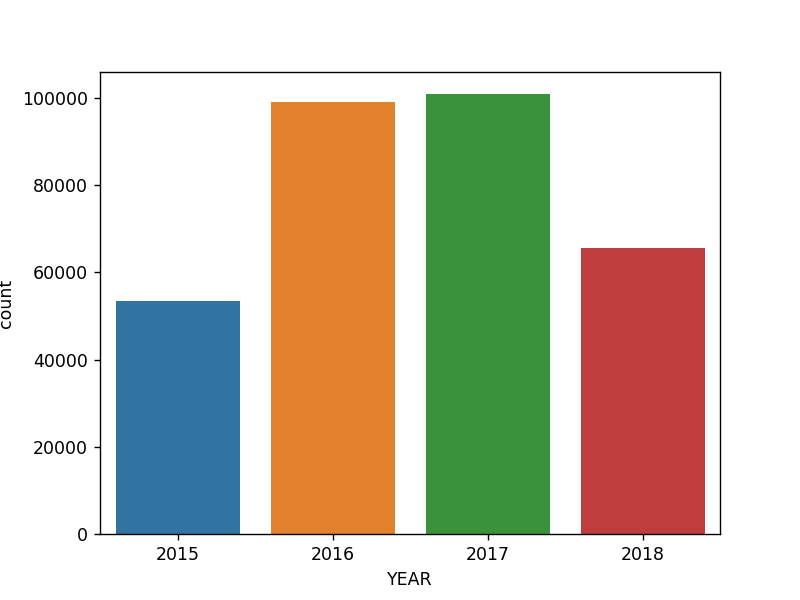

In [23]:
sns.countplot(data = df, x = 'YEAR')

In [24]:
plt.close()

<IPython.core.display.Javascript object>


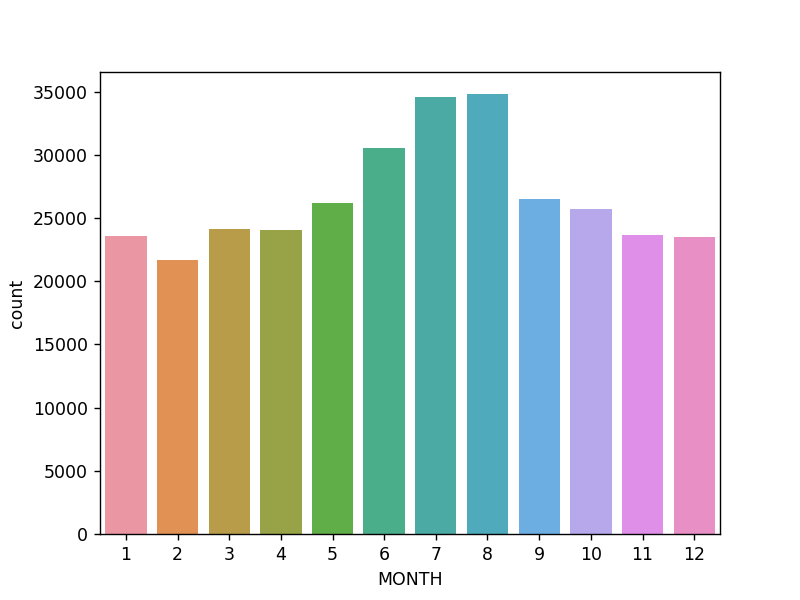

In [25]:
sns.countplot(data = df, x = 'MONTH')

In [26]:
plt.close()

<IPython.core.display.Javascript object>


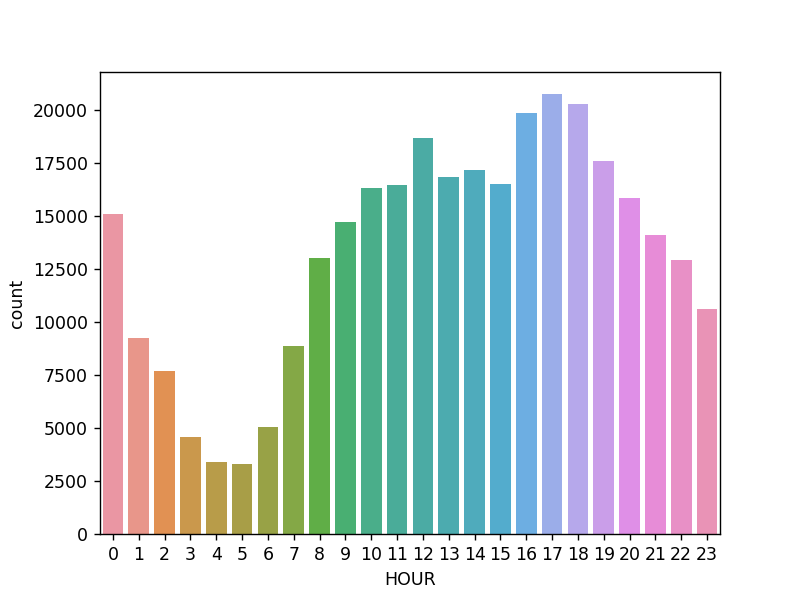

In [27]:
sns.countplot(data = df, x = 'HOUR')

In [28]:
plt.close()

In [29]:
ord = df['OFFENSE_CODE_GROUP'].value_counts().head(5).index

In [30]:
ord

CategoricalIndex(['Motor Vehicle Accident Response', 'Larceny',
                  'Medical Assistance', 'Investigate Person', 'Other'],
                 categories=['Aggravated Assault', 'Aircraft', 'Arson', 'Assembly or Gathering Violations', 'Auto Theft', 'Auto Theft Recovery', 'Ballistics', 'Biological Threat', ...], ordered=False, dtype='category')

<IPython.core.display.Javascript object>


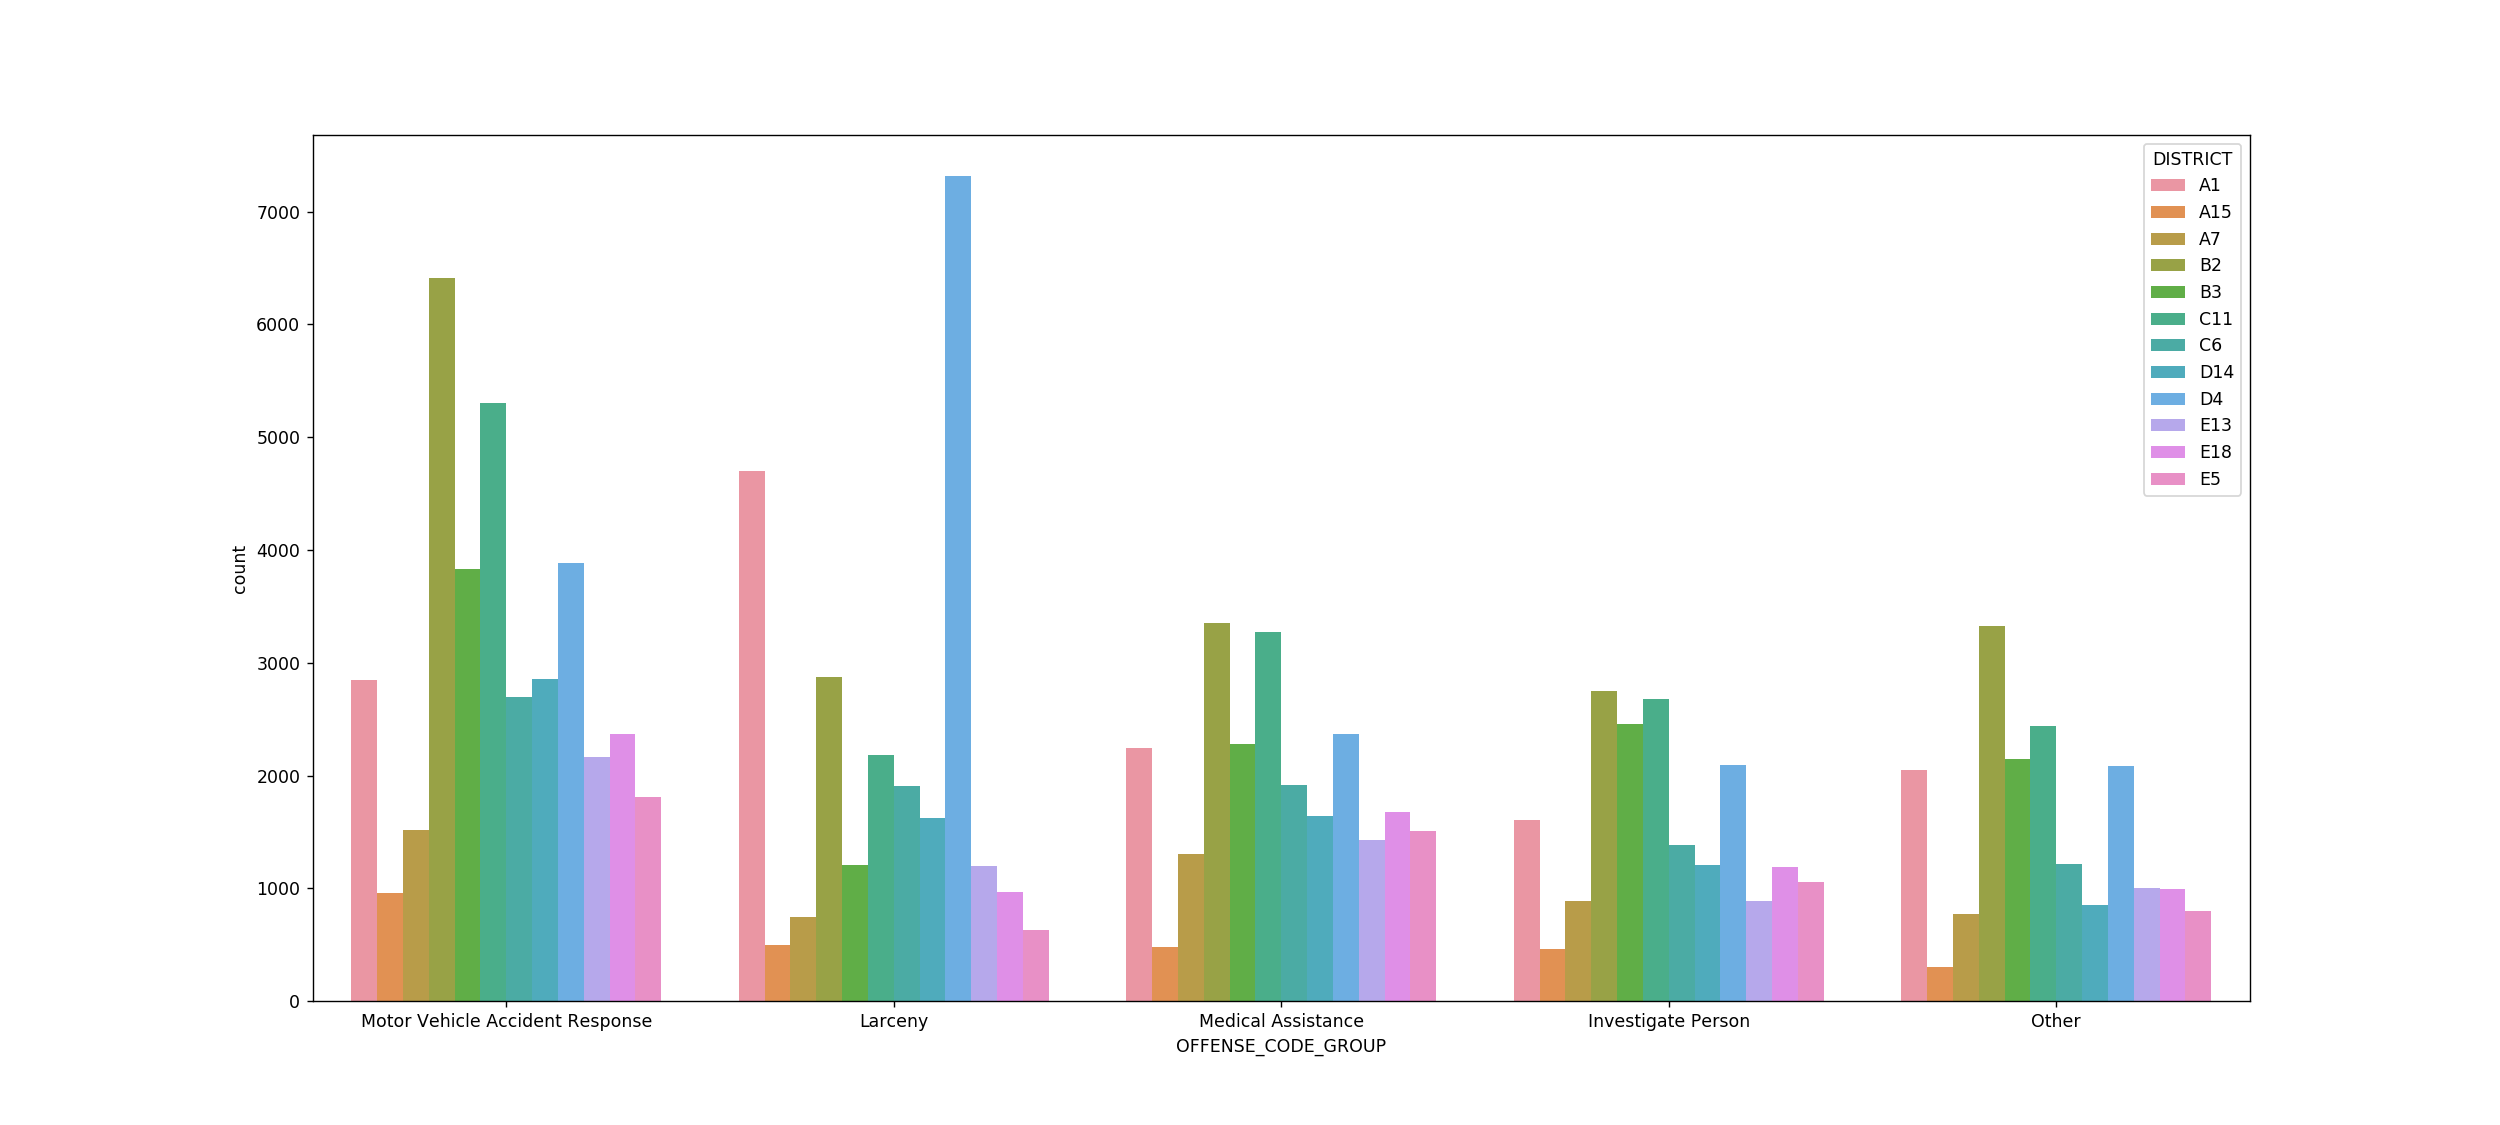

In [31]:
fig = plt.figure(figsize=(20, 9))

In [32]:
sns.countplot(data = df, x = 'OFFENSE_CODE_GROUP', hue = 'DISTRICT', order = ord)

In [33]:
plt.close()

In [34]:
df['QUARTER'] = df['OCCURRED_ON_DATE'].dt.quarter
df.QUARTER = df.QUARTER.astype('category')

<IPython.core.display.Javascript object>


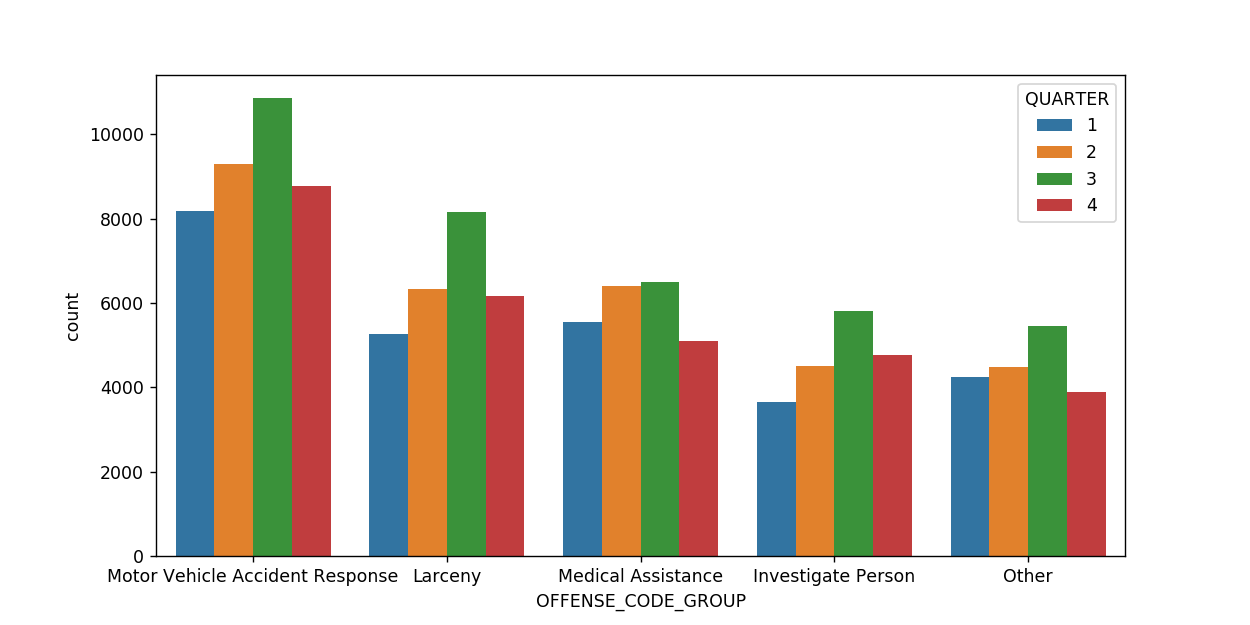

In [35]:
fig = plt.figure(figsize=(10, 5))

In [36]:
sns.countplot(data = df, x = 'OFFENSE_CODE_GROUP', hue = 'QUARTER', order = ord)

In [37]:
plt.close()

In [38]:
df.YEAR.unique()

array([2018, 2017, 2016, 2015], dtype=int64)

In [39]:
bool_mask = ((df['YEAR'] == 2016) | (df['YEAR'] == 2017) | (df['YEAR'] == 2018))

In [40]:
grped = df[bool_mask].groupby(['MONTH', 'DISTRICT']).count()

<IPython.core.display.Javascript object>


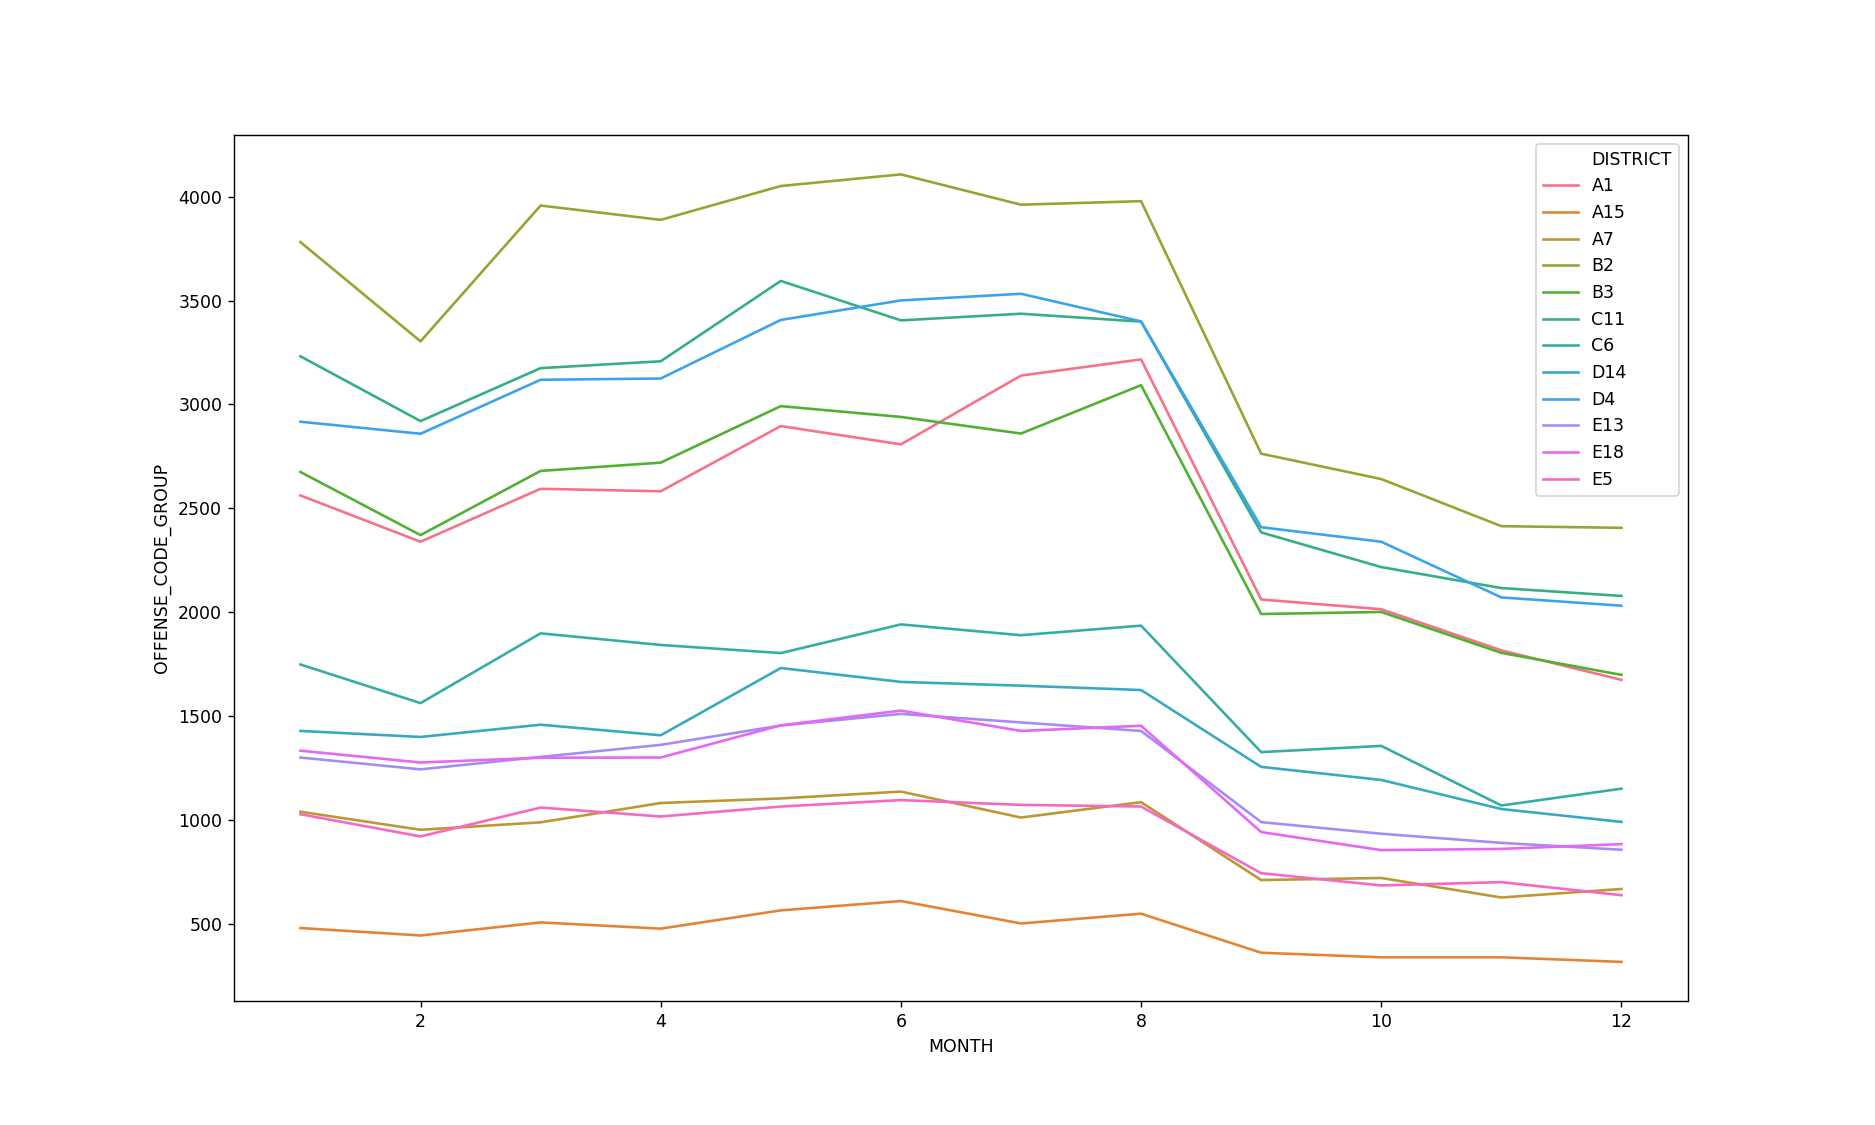

In [41]:
fig = plt.figure(figsize=(15, 9))

In [42]:
sns.lineplot(data = grped.reset_index(), x = 'MONTH', y = 'OFFENSE_CODE_GROUP', hue = 'DISTRICT')

In [43]:
plt.close()

<IPython.core.display.Javascript object>


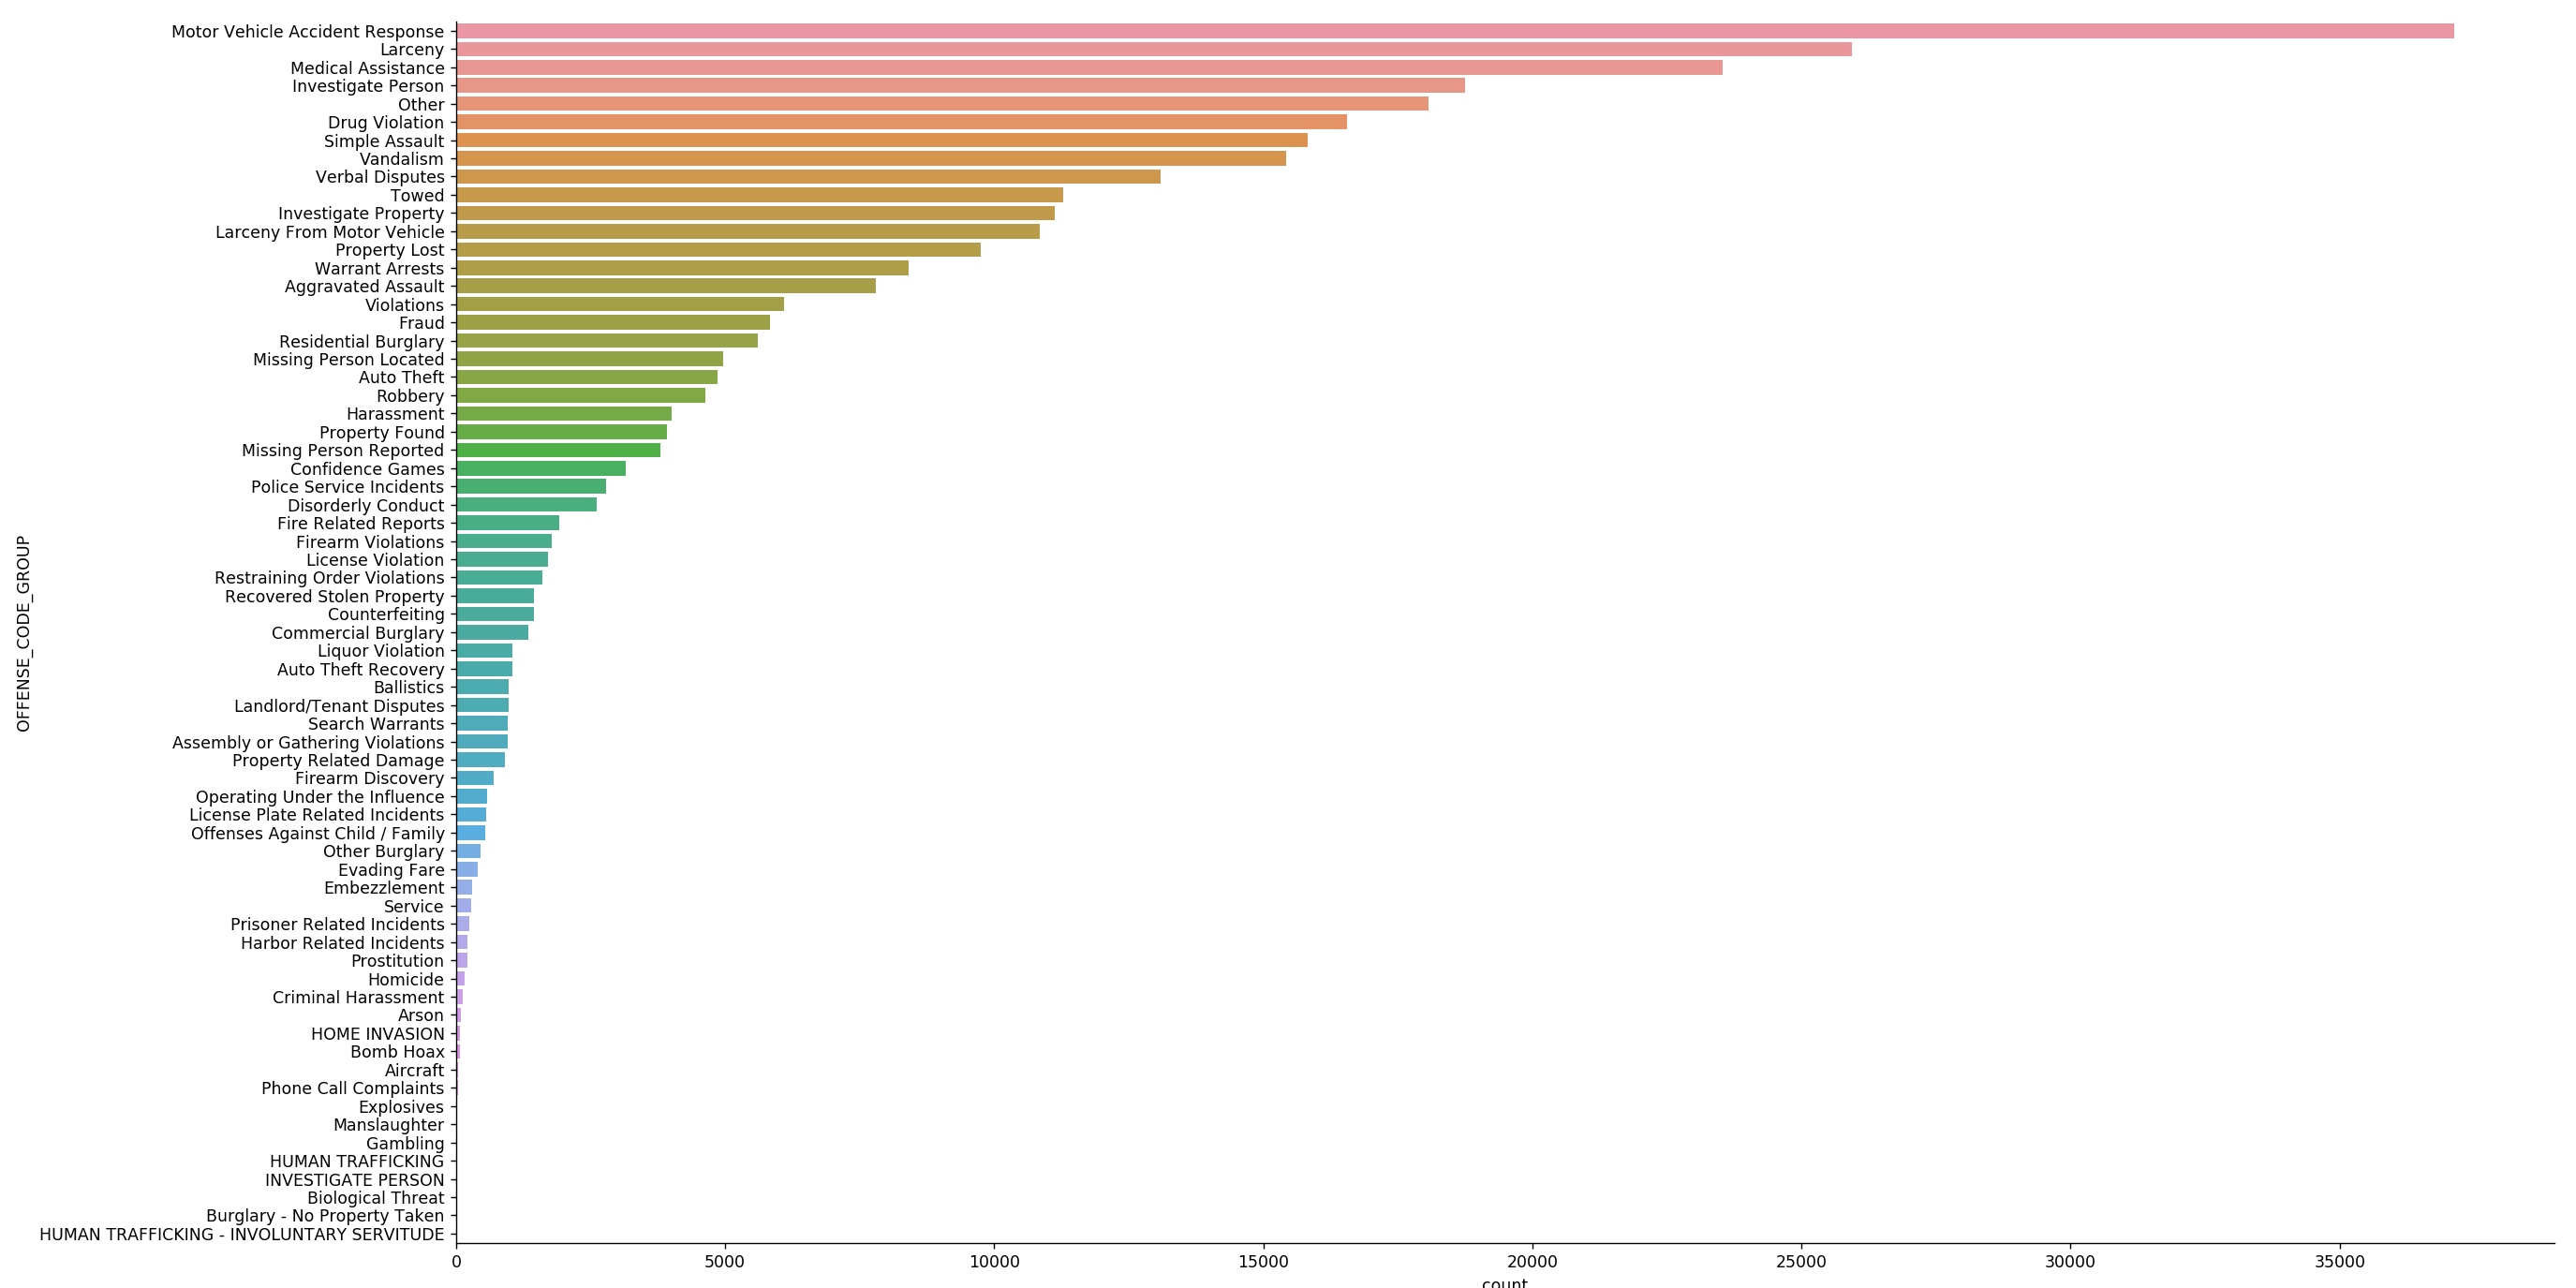

In [44]:
sns.catplot(y = 'OFFENSE_CODE_GROUP', kind = 'count', height = 11, aspect = 2,
           order = df.OFFENSE_CODE_GROUP.value_counts().index, data = df)

In [45]:
plt.close()

In [46]:
labs = df['OFFENSE_CODE_GROUP'].astype('category').cat.categories.tolist()
labs

['Aggravated Assault',
 'Aircraft',
 'Arson',
 'Assembly or Gathering Violations',
 'Auto Theft',
 'Auto Theft Recovery',
 'Ballistics',
 'Biological Threat',
 'Bomb Hoax',
 'Burglary - No Property Taken',
 'Commercial Burglary',
 'Confidence Games',
 'Counterfeiting',
 'Criminal Harassment',
 'Disorderly Conduct',
 'Drug Violation',
 'Embezzlement',
 'Evading Fare',
 'Explosives',
 'Fire Related Reports',
 'Firearm Discovery',
 'Firearm Violations',
 'Fraud',
 'Gambling',
 'HOME INVASION',
 'HUMAN TRAFFICKING',
 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE',
 'Harassment',
 'Harbor Related Incidents',
 'Homicide',
 'INVESTIGATE PERSON',
 'Investigate Person',
 'Investigate Property',
 'Landlord/Tenant Disputes',
 'Larceny',
 'Larceny From Motor Vehicle',
 'License Plate Related Incidents',
 'License Violation',
 'Liquor Violation',
 'Manslaughter',
 'Medical Assistance',
 'Missing Person Located',
 'Missing Person Reported',
 'Motor Vehicle Accident Response',
 'Offenses Against Child /

In [47]:
counts = df['OFFENSE_CODE_GROUP'].value_counts()
counts.head()

Motor Vehicle Accident Response    37132
Larceny                            25935
Medical Assistance                 23540
Investigate Person                 18750
Other                              18075
Name: OFFENSE_CODE_GROUP, dtype: int64

In [48]:
sizes = [counts[var_cat] for var_cat in labs]

In [49]:
sizes[:5]

[7807, 36, 94, 955, 4851]

<IPython.core.display.Javascript object>


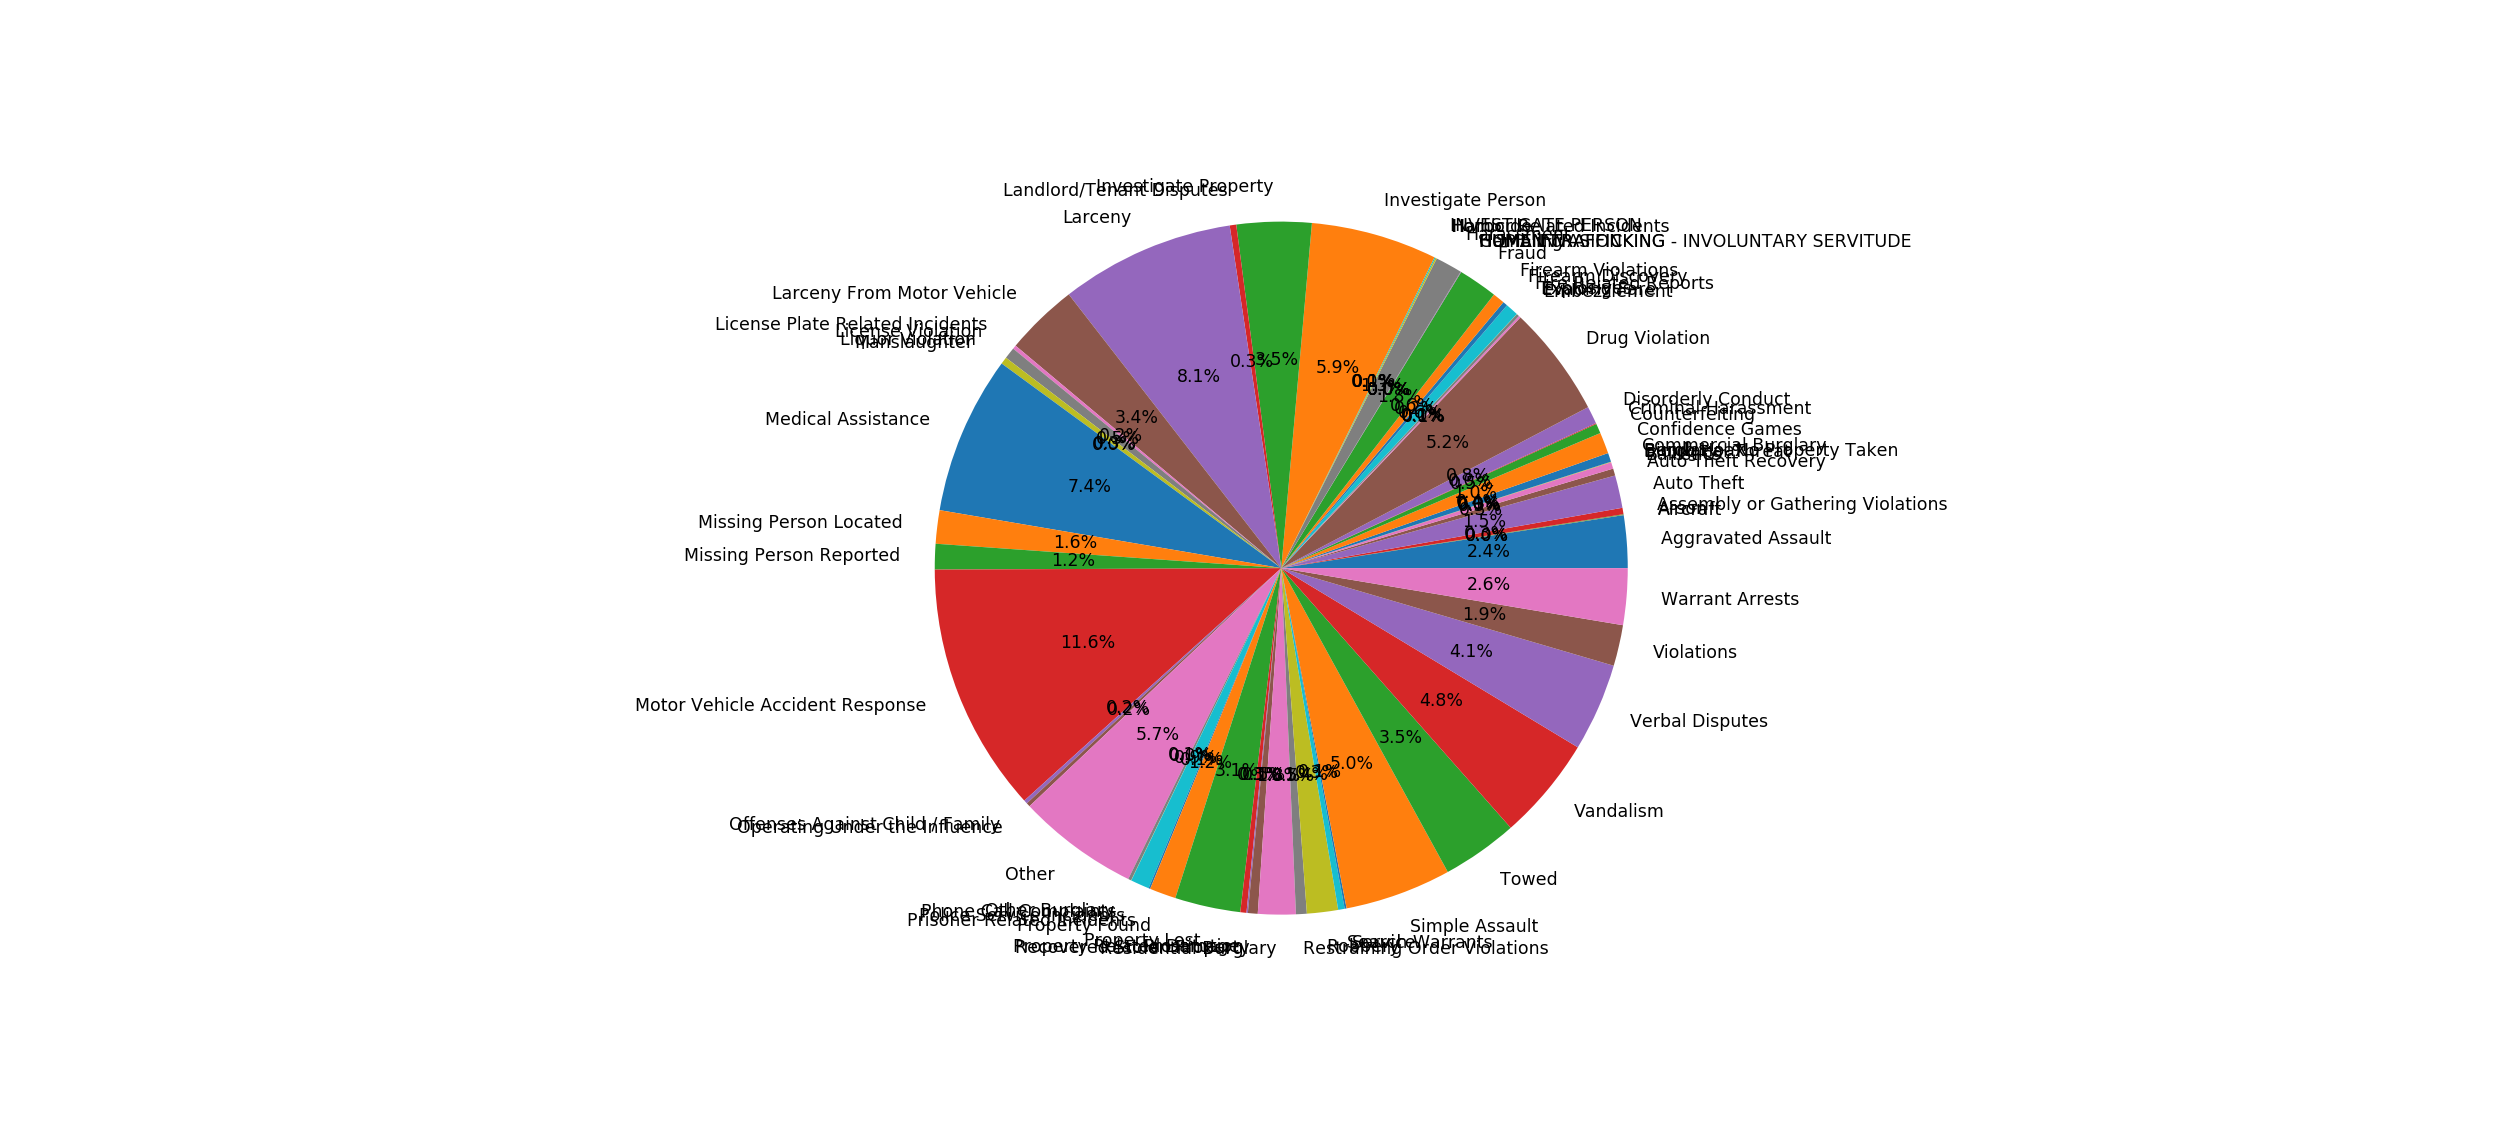

In [50]:
fig = plt.figure(figsize=(20, 9))

In [51]:
plt.pie(sizes, labels = labs, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x253a2577e80>,
 [Text(1.0967518443402882, 0.08447124916903119, 'Aggravated Assault'),
  Text(1.0869667859745127, 0.16882892580431322, 'Aircraft'),
  Text(1.0867497979714273, 0.17022008286057885, 'Arson'),
  Text(1.0849337539830943, 0.18143524869261385, 'Assembly or Gathering Violations'),
  Text(1.072795232819966, 0.24312628084753732, 'Auto Theft'),
  Text(1.056863999277199, 0.30502210908687366, 'Auto Theft Recovery'),
  Text(1.0505502921720518, 0.32610440600705887, 'Ballistics'),
  Text(1.047344896573907, 0.3362568476932362, 'Biological Threat'),
  Text(1.0470896651773194, 0.33705078709127684, 'Bomb Hoax'),
  Text(1.0468338319353705, 0.33784453275953524, 'Burglary - No Property Taken'),
  Text(1.0422889132001125, 0.3516160141690485, 'Commercial Burglary'),
  Text(1.0257546612426456, 0.39727493620789317, 'Confidence Games'),
  Text(1.0067113305003166, 0.44331963304401756, 'Counterfeiting'),
  Text(0.9996706179926698, 0.45897565896477993, 'Criminal Harass

In [52]:
plt.close()

<IPython.core.display.Javascript object>


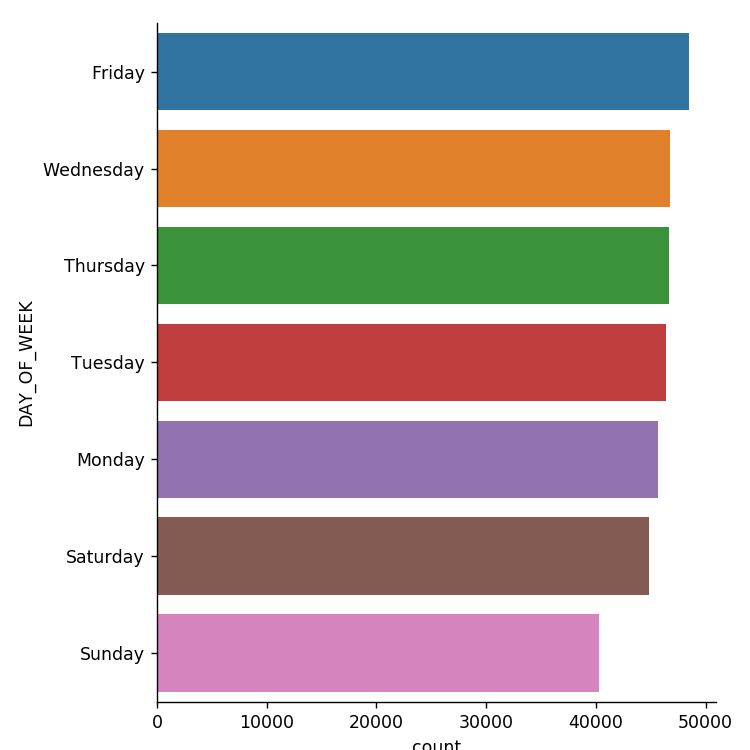

In [53]:
fig = sns.catplot(y = 'DAY_OF_WEEK', kind = 'count', height = 6, aspect = 1, order = df.DAY_OF_WEEK.value_counts().index, data = df)

In [54]:
plt.close()

In [55]:
grped = df.groupby(['MONTH', 'DISTRICT']).count()

<IPython.core.display.Javascript object>


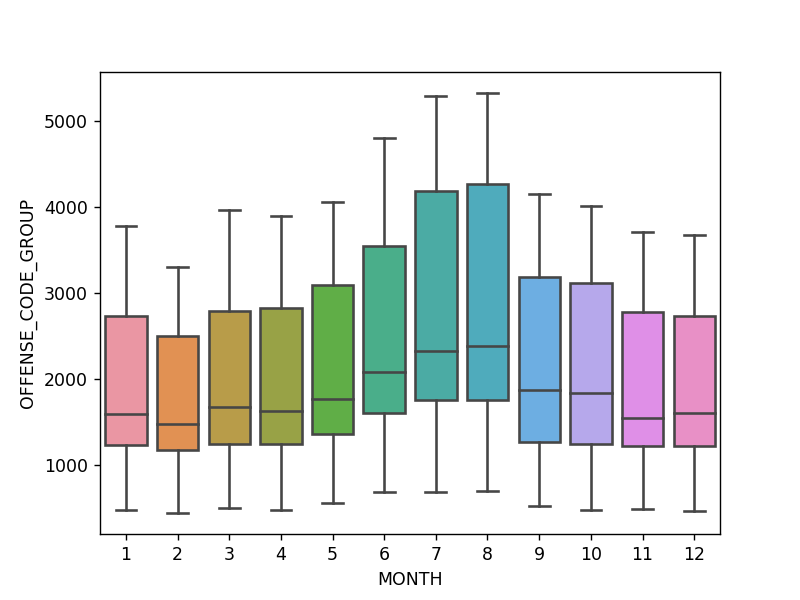

In [56]:
sns.boxplot(x = 'MONTH', y = 'OFFENSE_CODE_GROUP', data = grped.reset_index())

In [57]:
plt.close()

<IPython.core.display.Javascript object>


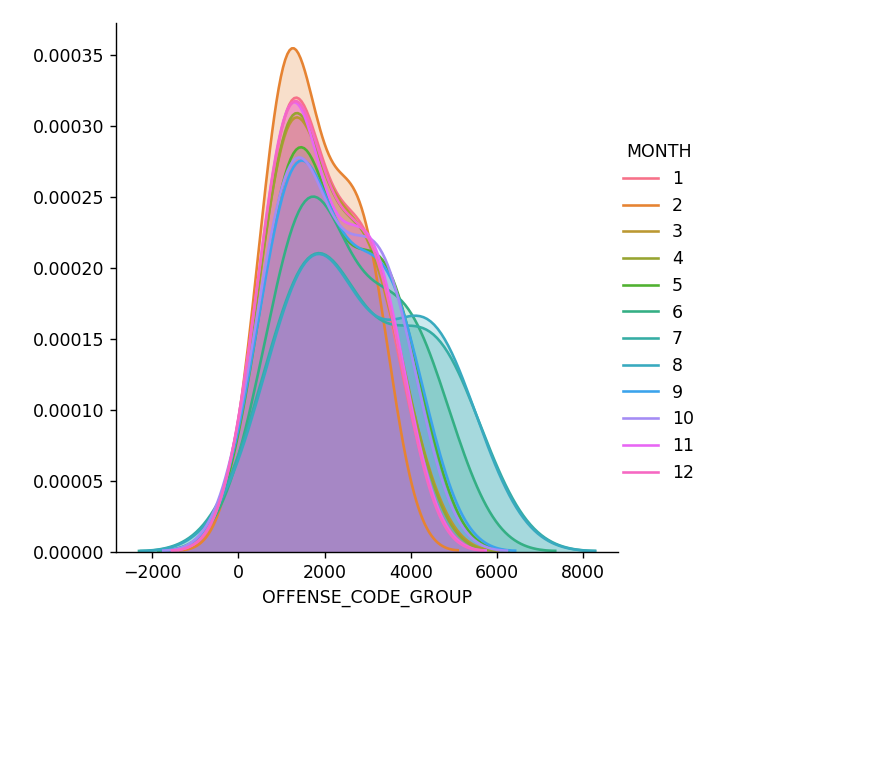

In [58]:
sns.FacetGrid(data = grped.reset_index(), hue = 'MONTH', height = 5).map(sns.kdeplot, 'OFFENSE_CODE_GROUP', shade = True).add_legend()

In [59]:
plt.close()

In [60]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location', 'QUARTER'],
      dtype='object')

In [61]:
def eda_object(df,feature):
    a = len(df[feature].unique())
    plt.figure(figsize = [20,min(max(8,a),12)])

    plt.subplot(1,2,1)
    x_ = df.groupby([feature])[feature].count()
    x_.plot(kind='pie')
    plt.title(feature)

    plt.subplot(1,2,2)
    cross_tab = pd.crosstab(df['YEAR'],df[feature],normalize=0).reset_index()
    x_ = cross_tab.melt(id_vars=['YEAR'])
    x_['value'] = x_['value']

    sns.barplot(x=feature, y='value',hue ='YEAR',data=x_,palette = ['b','r','g'],alpha =0.7)
    plt.xticks(rotation='vertical')
    plt.title(feature + " - ")


    plt.tight_layout()
    plt.legend()
    plt.show()

rm_list = ['UCR_PART', 'INCIDENT_NUMBER', 'Location', 'STREET']
type_list = ['object']
feature_list = []

for feature in df.columns:
    if (feature not in rm_list) & (df[feature].dtypes in type_list):
        feature_list.append(feature)

<IPython.core.display.Javascript object>


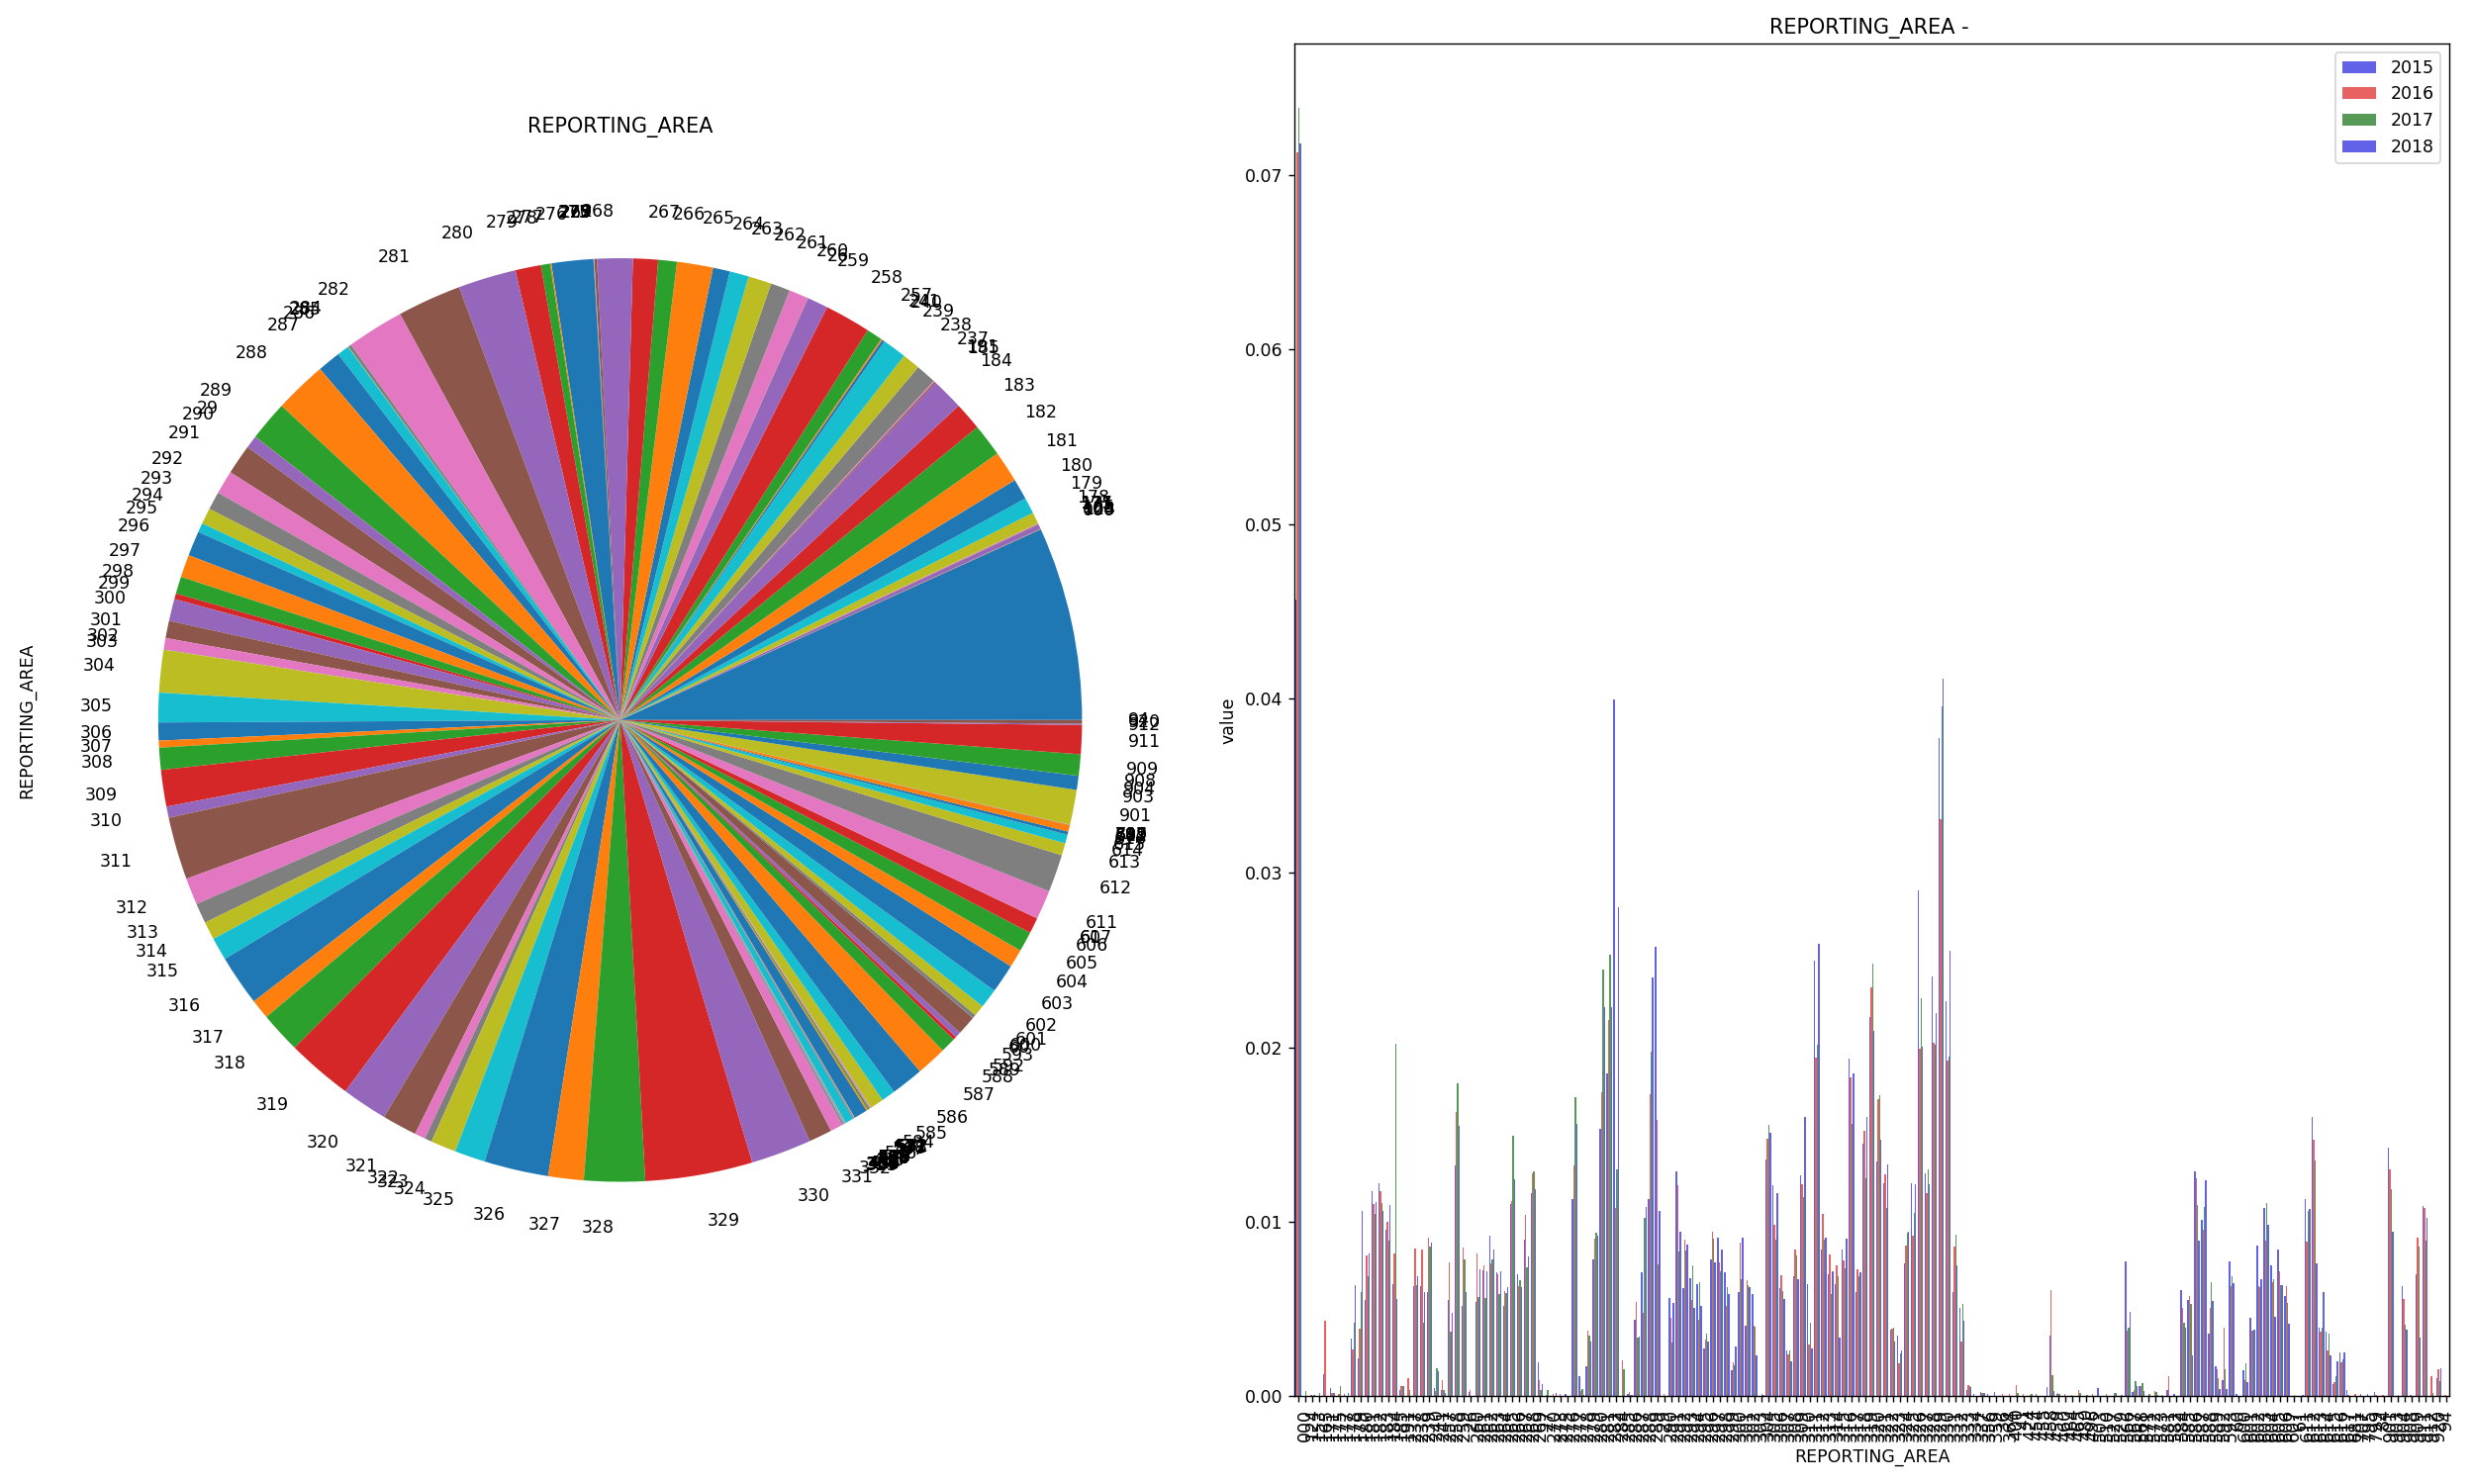

In [62]:
B2_district=df.loc[df.DISTRICT=='B2']
for feature in feature_list:
    eda_object(B2_district,feature)

In [63]:
plt.close()

In [64]:
df.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'OCCURRED_ON_DATE',
       'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART', 'STREET', 'Lat',
       'Long', 'Location', 'QUARTER'],
      dtype='object')

In [65]:
def eda_numeric(df,feature):
    x_ = df[feature]
    y_ = df['DISTRICT']
    data = pd.concat([x_,y_],1)
    plt.figure(figsize=[20,5])

    ax1 = plt.subplot(1,2,1)
    sns.boxplot(x='DISTRICT',y=feature,data=data)
    plt.title(feature + " - Boxplot")

    ax2 = plt.subplot(1,2,2)
    plt.title(feature+ " - Density")
    
    p1=sns.kdeplot(data[data['DISTRICT']=="D4"][feature].apply(np.log), color="b",legend=False)
    
    plt.legend(loc='upper right', labels=['0'])

    plt.tight_layout()
    plt.show()
    
rm_list = ['lat', 'long']
type_list = ['int32','int64']
feature_list = []

for feature in df.columns:
    if (feature not in rm_list) & (df[feature].dtypes in type_list) & (len(df[feature].unique()) > 2):
        feature_list.append(feature)

<IPython.core.display.Javascript object>


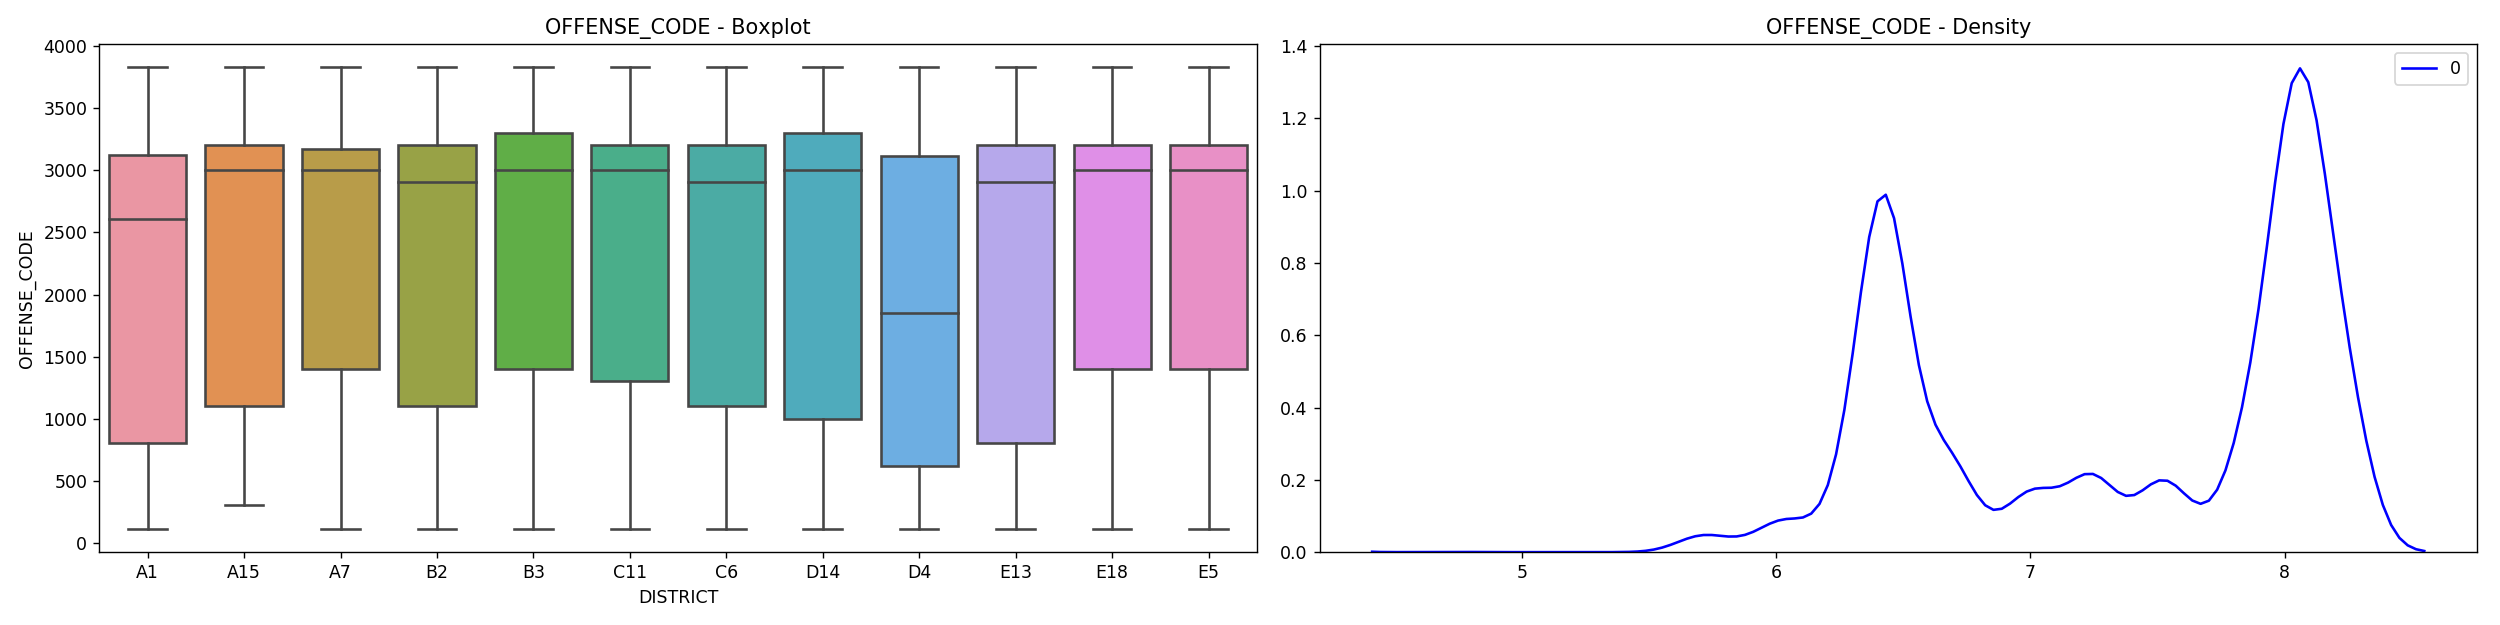

<IPython.core.display.Javascript object>


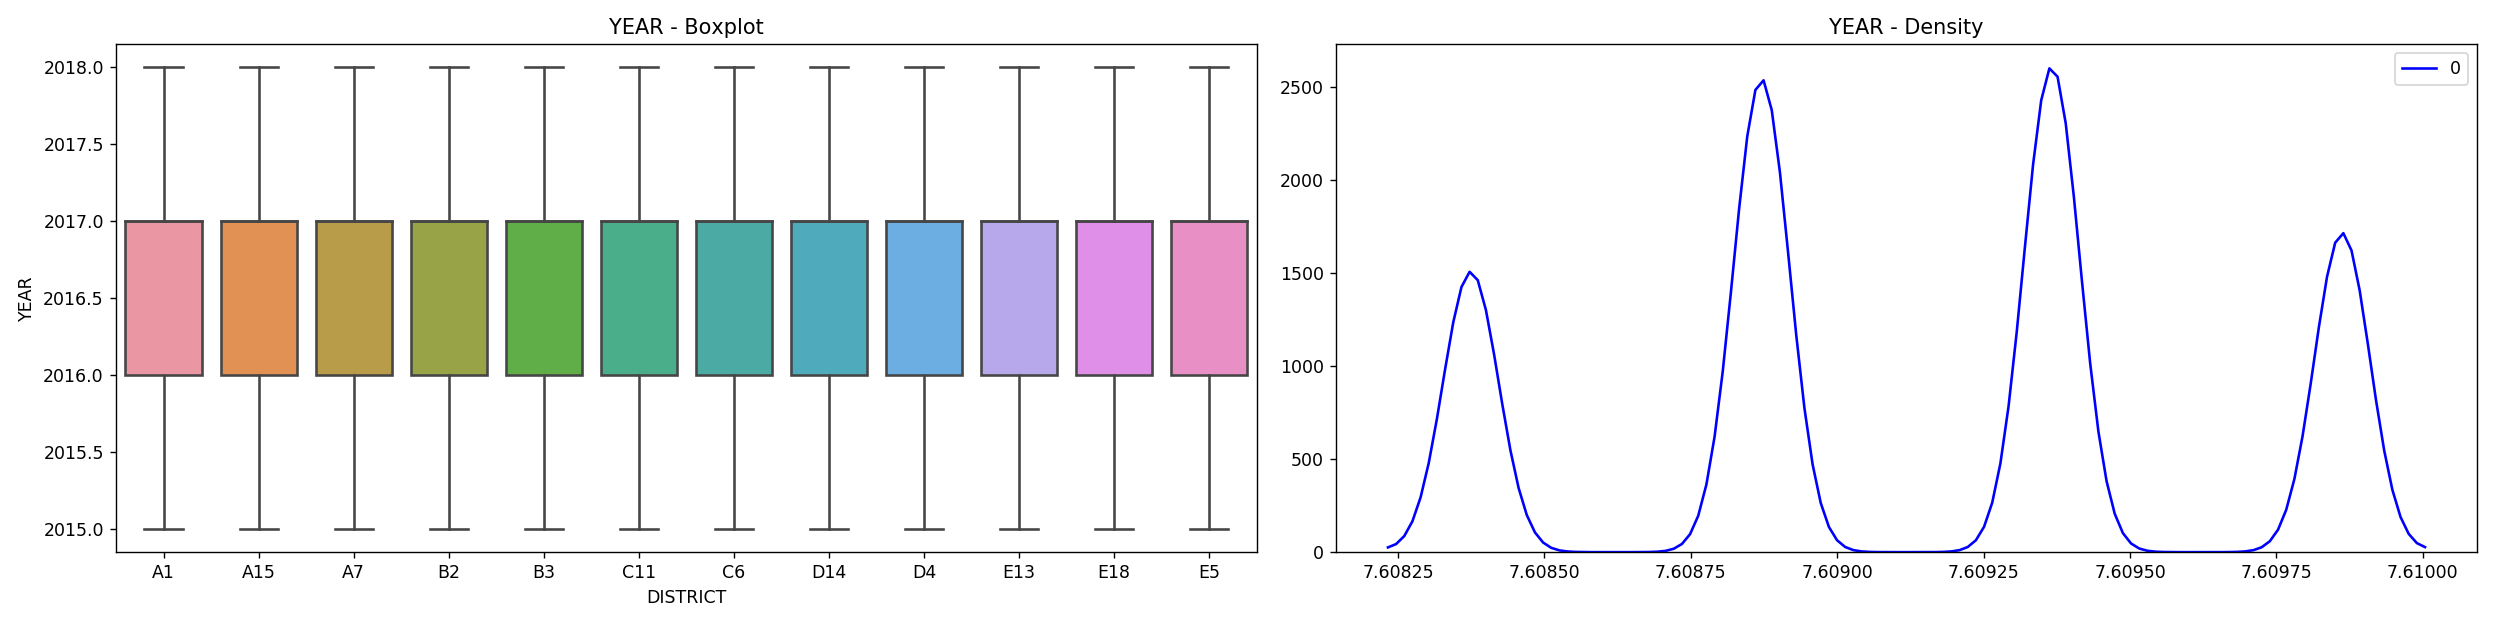

<IPython.core.display.Javascript object>


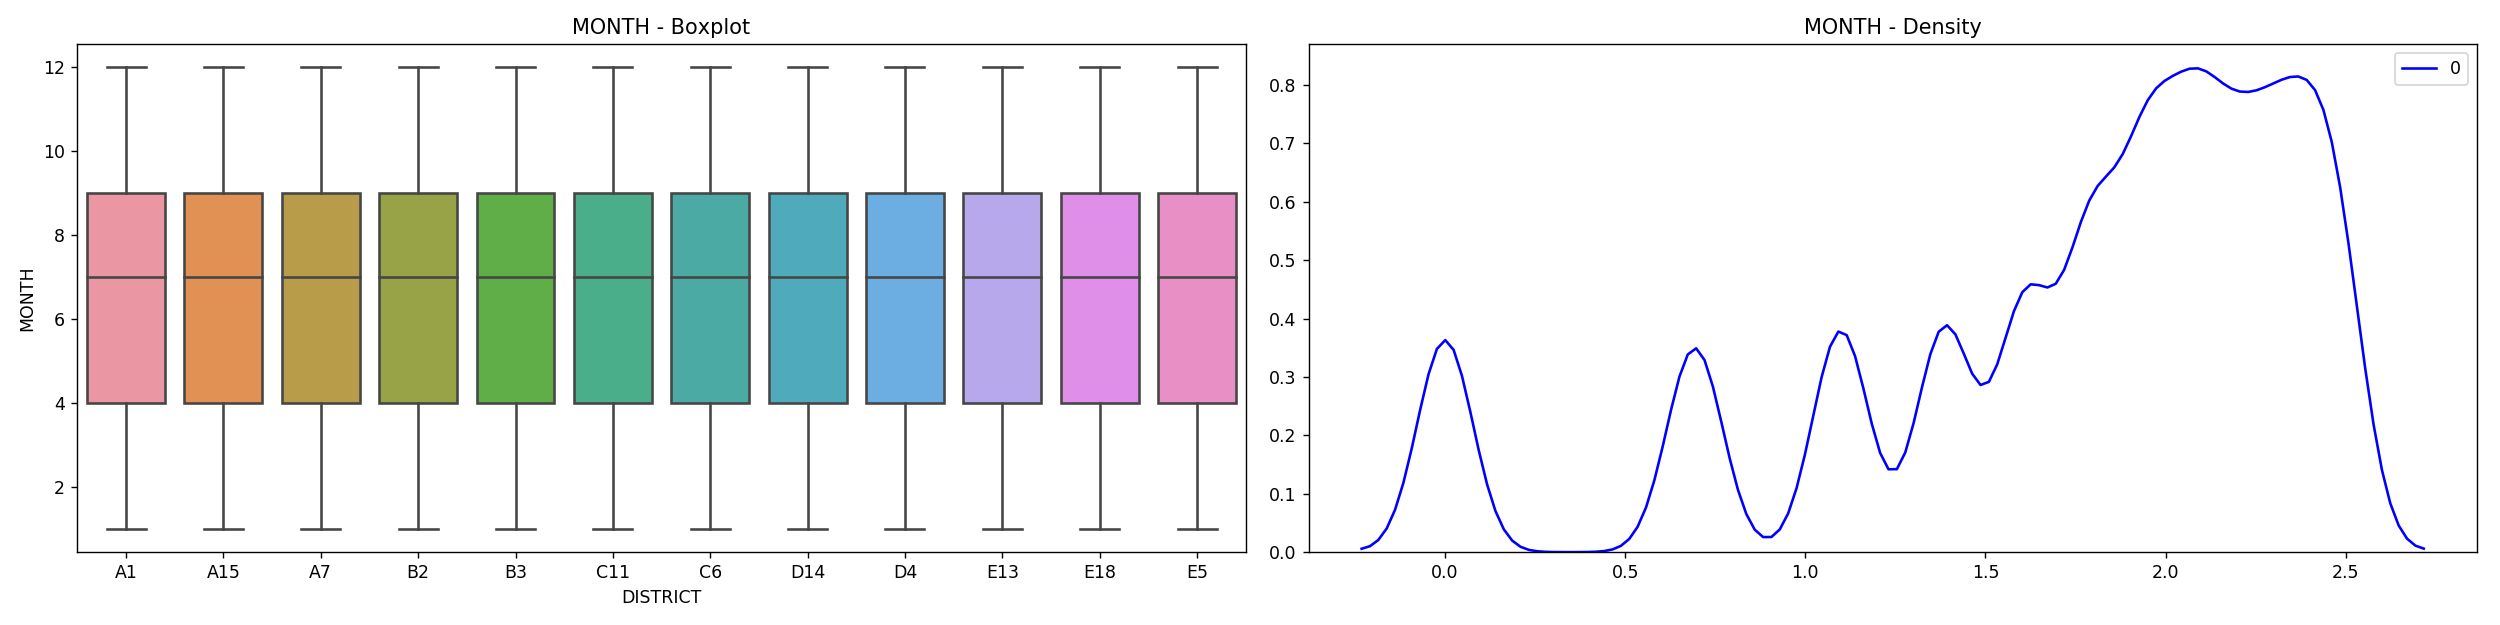

<IPython.core.display.Javascript object>


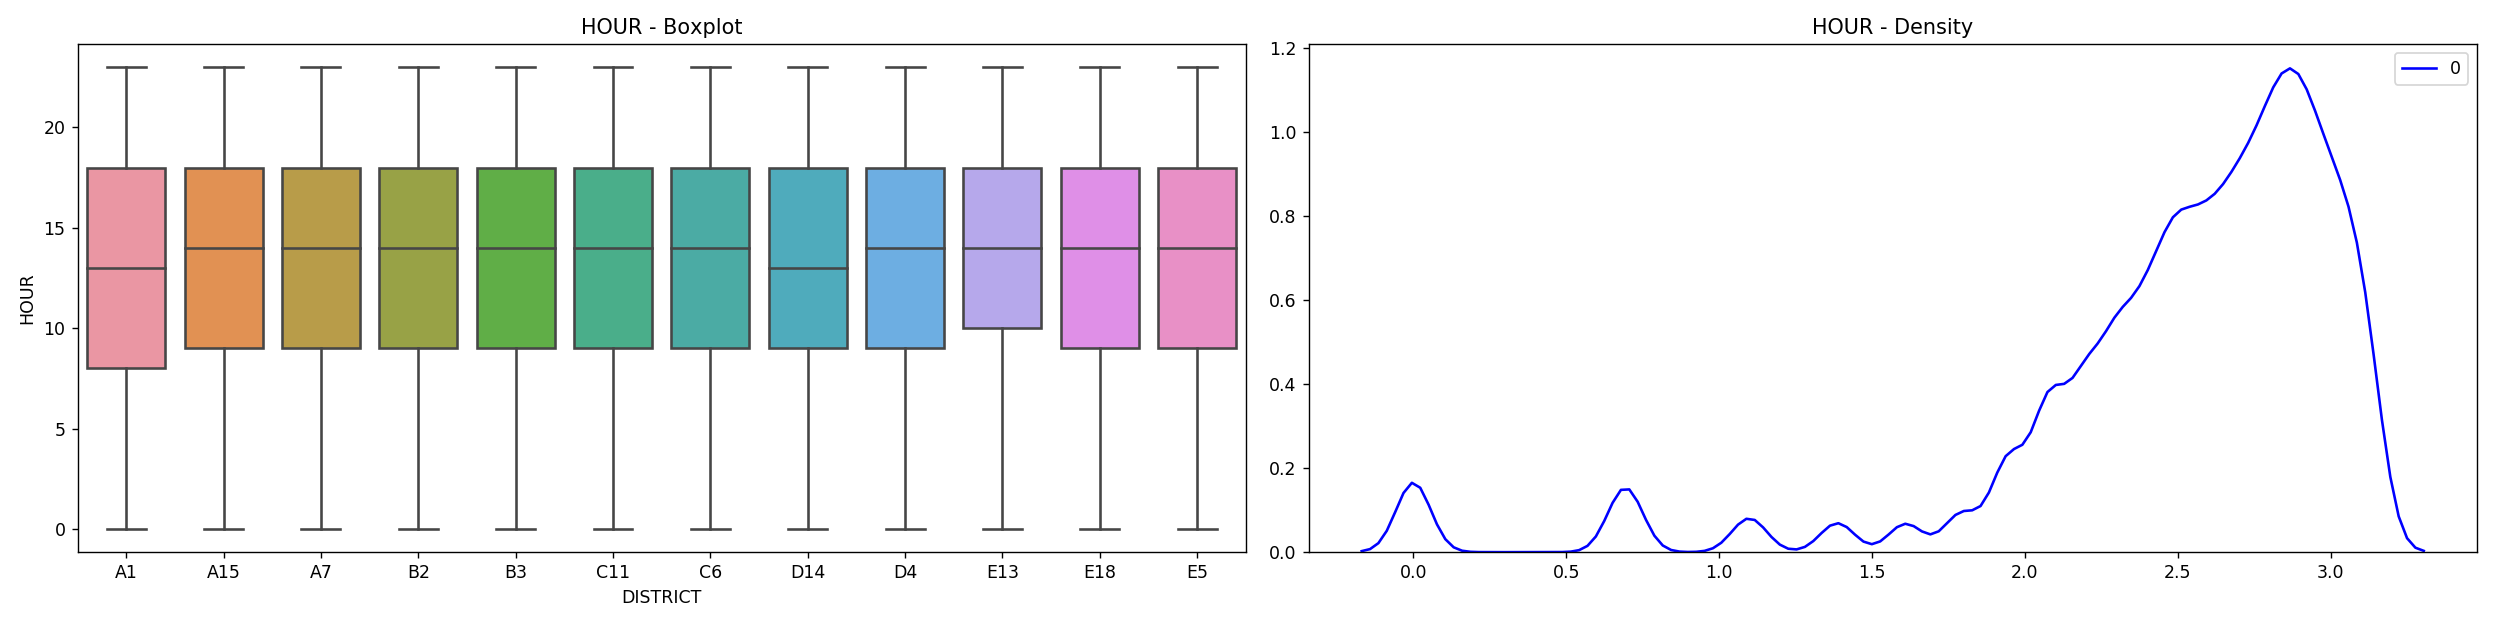

In [66]:
df_drop = df.dropna().copy()

for feature in feature_list:
    eda_numeric(df_drop,feature)

In [67]:
plt.close()
plt.close()
plt.close()
plt.close()

In [68]:
data = data.loc[data['YEAR'].isin([2016,2017,2018])]
data = data.loc[data['UCR_PART'] == 'Part One']
data = data.drop(['INCIDENT_NUMBER','OFFENSE_CODE','UCR_PART','Location'], axis=1)
data['OCCURRED_ON_DATE'] = pd.to_datetime(data['OCCURRED_ON_DATE'])

In [69]:
data.SHOOTING.fillna('N', inplace=True)

In [71]:
data.DAY_OF_WEEK = pd.Categorical(data.DAY_OF_WEEK,
                                  categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],
                                  ordered=True)

In [73]:
data.Lat.replace(-1, None, inplace=True)
data.Long.replace(-1, None, inplace=True)

<IPython.core.display.Javascript object>


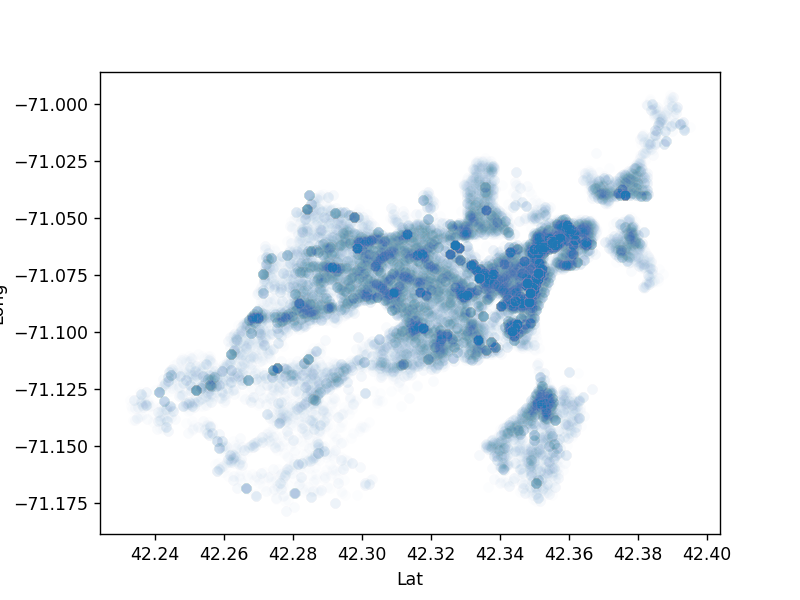

In [74]:
sns.scatterplot(x='Lat', y='Long', alpha=0.01, data=data)

In [75]:
plt.close()